#### Домашняя работа

Попробуйте обучить нейронную сеть на Keras на Fashion-MNIST датасете. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [133]:
#!pip install keras
#!pip install mnist

In [134]:
import numpy as np
import mnist
import keras

import numpy as np
#import  mnist
import keras

In [135]:
fashion_mnist=keras.datasets.fashion_mnist


#train_images = fashion_mnist.train_images()
#train_labels = fashion_mnist_labels()

#print(train_images.shape) # (60000, 28, 28)
#print(train_labels.shape) # (60000,)

In [136]:
from keras.datasets import mnist

#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

(train_images,train_labels),(test_images,testn_labels)=fashion_mnist.load_data()

# Normalize the images.
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


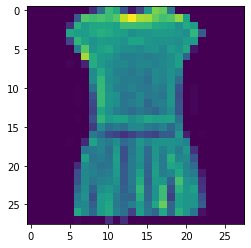

In [137]:
#просмотр изображения

import matplotlib.pyplot as plt

plt.imshow((train_images[3,:].reshape((28,28))+1)/2)
plt.show()

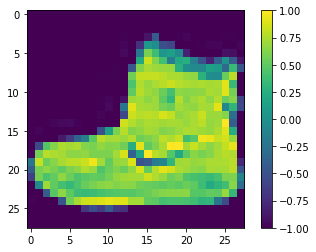

In [138]:
plt.figure()
plt.imshow(train_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [139]:
keras.backend.backend()

'tensorflow'

In [140]:
# The full neural network code!
###############################
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

In [141]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [142]:
# Build the model.
model = Sequential()
model.add( Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(  Dense(10, activation='softmax'))

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [143]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [144]:
yy=to_categorical(train_labels,10) #преобразуем в матрицу c количеством столбцов, сколько существует классов.
yy[0,:] #выведем одну строку

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [145]:
train_labels #вектор правильных ответов в тренировочной выборке

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [146]:
# Начинаем тренировать тренировочную выборку
model.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=5,
  batch_size=32, 
    
    validation_split=0.2
)

# оценка модели.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5183 - accuracy: 0.8130 - val_loss: 0.4181 - val_accuracy: 0.8509
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3917 - accuracy: 0.8560 - val_loss: 0.4154 - val_accuracy: 0.8491
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3537 - accuracy: 0.8697 - val_loss: 0.3819 - val_accuracy: 0.8573
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3316 - accuracy: 0.8776 - val_loss: 0.3893 - val_accuracy: 0.8527
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3703 - accuracy: 0.8653


[0.37026578187942505, 0.8652999997138977]

In [152]:
N_test = 10
# Прогноз первых 5 тестовых изображений
predictions = model.predict(test_images[:N_test])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # 

# Check our predictions against the ground truths.
print(test_labels[:N_test]) # 

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [153]:
#for i in range(0,5):
#    plt.imshow((test_images[i,:].reshape((28,28))+1)/2)
#    plt.show()

In [154]:
predictions[0,:]

array([1.6564058e-05, 1.1673696e-06, 5.6228919e-06, 2.8918507e-06,
       2.1442985e-07, 1.0629003e-03, 3.4623863e-06, 4.1515745e-02,
       5.7859030e-05, 9.5733362e-01], dtype=float32)

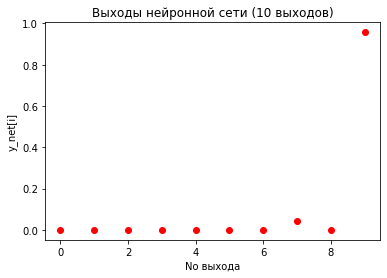

In [155]:
plt.plot(predictions[0,:], 'or')
plt.title('Выходы нейронной сети (10 выходов)')
plt.xlabel('No выхода')
plt.ylabel('y_net[i]')
plt.show()

In [156]:
y_pred = np.argmax(predictions, axis=1)

In [157]:
y_pred[:N_test]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

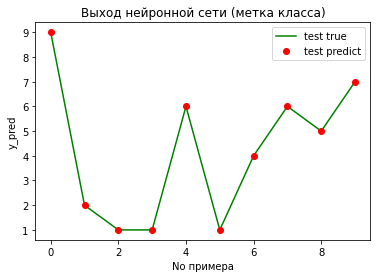

In [158]:
plt.plot(testn_labels[:N_test], 'g',label = 'test true')
plt.plot(y_pred[:N_test], 'or',label='test predict')
plt.legend()
plt.title('Выход нейронной сети (метка класса)')
plt.xlabel('No примера')
plt.ylabel('y_pred')
plt.show()

In [159]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5

### Используем для обучения другие функции активации: tanh и linear

In [160]:
# Build the model.
model_1 = Sequential()
model_1.add( Dense(64, activation='tanh', input_shape=(784,)))
model_1.add(Dense(64, activation='tanh'))
model_1.add(  Dense(10, activation='softmax'))

# Compile the model.
model_1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [161]:
# Начинаем тренировать тренировочную выборку
model_1.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=5,
  batch_size=32, 
    
    validation_split=0.2
)

# оценка модели.
model_1.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5170 - accuracy: 0.8153 - val_loss: 0.4251 - val_accuracy: 0.8423
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3912 - accuracy: 0.8577 - val_loss: 0.4272 - val_accuracy: 0.8445
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3532 - accuracy: 0.8706 - val_loss: 0.3715 - val_accuracy: 0.8673
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3285 - accuracy: 0.8800 - val_loss: 0.3447 - val_accuracy: 0.8778
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.8662


[0.3710896968841553, 0.8661999702453613]

In [162]:
N_test = 10
# Прогноз первых 5 тестовых изображений
predictions = model.predict(test_images[:N_test])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # 

# Check our predictions against the ground truths.
print(test_labels[:N_test]) #

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


#### Активационная функция tanh показала худшие результаты

#### Обучим модель с активационной функцией linear

In [163]:
# Build the model.
model_2 = Sequential()
model_2.add( Dense(64, activation='linear', input_shape=(784,)))
model_2.add(Dense(64, activation='linear'))
model_2.add(  Dense(10, activation='softmax'))

# Compile the model.
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [164]:
# Начинаем тренировать тренировочную выборку
model_2.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=5,
  batch_size=32, 
    
    validation_split=0.2
)

# оценка модели.
model_2.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5454 - accuracy: 0.8062 - val_loss: 0.4680 - val_accuracy: 0.8396
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4711 - accuracy: 0.8327 - val_loss: 0.4663 - val_accuracy: 0.8296
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4547 - accuracy: 0.8398 - val_loss: 0.4565 - val_accuracy: 0.8342
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4439 - accuracy: 0.8447 - val_loss: 0.4841 - val_accuracy: 0.8332
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4875 - accuracy: 0.8287


[0.48753994703292847, 0.8287000060081482]

#### функция lenear показала себя хуже всех

### Добавим несколько слоёв и нейронов

In [174]:
# Build the model.
model_3 = Sequential()
model_3.add( Dense(128, activation='relu', input_shape=(784,)))
#model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(  Dense(10, activation='softmax'))

# Compile the model.
model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [175]:
# Начинаем тренировать тренировочную выборку
model_3.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=20,
  batch_size=32, 
    
    validation_split=0.2
)

# оценка модели.
model_3.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5073 - accuracy: 0.8157 - val_loss: 0.4297 - val_accuracy: 0.8457
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3846 - accuracy: 0.8578 - val_loss: 0.3933 - val_accuracy: 0.8574
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3467 - accuracy: 0.8711 - val_loss: 0.3536 - val_accuracy: 0.8708
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3184 - accuracy: 0.8814 - val_loss: 0.3428 - val_accuracy: 0.8770
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2986 - accuracy: 0.8894 - val_loss: 0.3504 - val_accuracy: 0.8743
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2829 - accuracy: 0.8952 - val_loss: 0.3424 - val_accuracy: 0.8761
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2702 - accuracy: 0.8993 - val_loss: 0.3328 - val_accuracy:

[0.3984605371952057, 0.8804000020027161]

In [176]:
N_test = 10
# Прогноз первых 5 тестовых изображений
predictions = model_3.predict(test_images[:N_test])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # 

# Check our predictions against the ground truths.
print(test_labels[:N_test]) # 

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


Для достижения лучшей точность нейросети мною были изменены следующие параметры нейросети:
    1. Количество слоёв нейросети;
    2. Активационные функции;
    3. Количество нейронов;
    4. Количество проходов (epoch)
    
Первые 3 параметра по отдельности дают небольшое улучшение качества (менее 1 %). При увеличении epoch качество моделе существенно возрастает, что связано с корректировкой весов. Наблюдения показали, что при большом увелечении проходов (более 100) accuracy стремится к 1, что вероятно связано с переобучением. 